In [118]:
import pickle
import pandas as pd
import numpy as np
import json

In [122]:
import matplotlib as mpl
import pylab as plt
%matplotlib inline 

In [120]:
wiki_id = "dewiki"
nmax = 10000

PATH_DATA = "../../data/{0}/testing/{0}.backtest-eval_mentions_nmax-{1}.json".format(wiki_id,nmax)

list_result = []
with open(PATH_DATA,'r') as fin:
    for line in fin:
        dict_eval = json.loads(line)
        list_result += [dict_eval]
        
        
len(list_result)


10000

In [121]:
list_result[0]

{'page': 'Walter Benton',
 'links': {'max roach': 'Max Roach', 'kenny clarke': 'Kenny Clarke'},
 'mentions': [['max roach', 0.931691586971283],
  ['kenny clarke', 0.9410001635551453]]}

In [131]:
list_p_true = [] ## link-probability of top-cand for linked mentions
list_p_false = [] ## link-probability of top-cand for not-linked mention
N_mentions = 0
for result in list_result:
    inp_pairs = result["links"]
    mentions = result["mentions"]
    N_mentions += len(set(list(inp_pairs.keys())))
    for m,p in mentions:
        if m in inp_pairs.keys():
            list_p_true += [p]
        else:
            list_p_false += [p]
N_mentions

24392

In [172]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

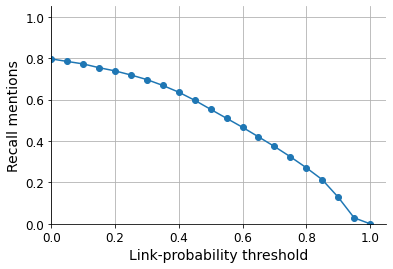

In [173]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

arr_p = np.linspace(0.0,1.0,21)
arr_p_recall = 0.0*arr_p
for i_p,p in enumerate(arr_p):
     arr_p_recall[i_p] = np.sum(list_p_true>=p)/N_mentions

x =arr_p
y =arr_p_recall
ax.plot(x,y,marker='o')
# ax.set_title("Cumulative distribution of linked mentions")

ax.set_xlabel("Link-probability threshold")
ax.set_ylabel("Recall mentions")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()

/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


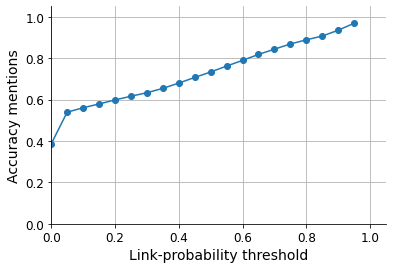

In [174]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

arr_p = np.linspace(0.0,1.0,21)
arr_p_pre = 0.0*arr_p
for i_p,p in enumerate(arr_p):
    n_true = np.sum(list_p_true>=p)
    n_false = np.sum(list_p_false>=p)
    arr_p_pre[i_p] = n_true/(n_true+n_false)

x =arr_p
y =arr_p_pre
ax.plot(x,y,marker='o')
# ax.set_title("Cumulative distribution of linked mentions")

ax.set_xlabel("Link-probability threshold")
ax.set_ylabel("Accuracy mentions")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()

## combined plot for different wikis

In [175]:
list_wiki_id = ["arwiki","bnwiki","cswiki","viwiki","dewiki","ptwiki","simplewiki"]
nmax = 10000

dict_result = {}
for wiki_id in list_wiki_id:

    PATH_DATA = "../../data/{0}/testing/{0}.backtest-eval_mentions_nmax-{1}.json".format(wiki_id,nmax)

    list_result = []
    with open(PATH_DATA,'r') as fin:
        for line in fin:
            dict_eval = json.loads(line)
            list_result += [dict_eval]
    dict_result[wiki_id] = list_result
    

In [176]:
dict_p_true = {}
dict_p_false = {}
dict_N_mentions = {}
for wiki_id in list_wiki_id:
    list_result = dict_result[wiki_id]
    list_p_true = [] ## link-probability of top-cand for linked mentions
    list_p_false = [] ## link-probability of top-cand for not-linked mention
    N_mentions = 0
    for result in list_result:
        inp_pairs = result["links"]
        mentions = result["mentions"]
        N_mentions += len(set(list(inp_pairs.keys())))
        for m,p in mentions:
            if m in inp_pairs.keys():
                list_p_true += [p]
            else:
                list_p_false += [p]
    dict_p_true[wiki_id] = list_p_true
    dict_p_false[wiki_id] = list_p_false
    dict_N_mentions[wiki_id] = N_mentions

/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app
/home/mgerlach/venv_custom/mwaddlink/lib/python3.7

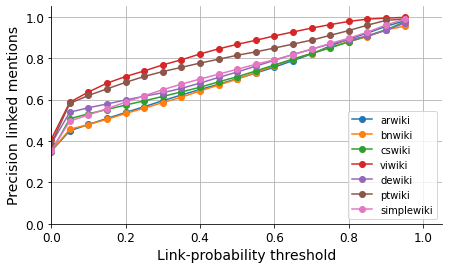

In [196]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(7,4 ))
# fig, axes = plt.subplots(2, 1 ,figsize=(6,10 ))

for wiki_id in list_wiki_id:
    list_p_true = dict_p_true[wiki_id]
    list_p_false = dict_p_false[wiki_id]
    N_mentions = dict_N_mentions[wiki_id]

    arr_p = np.linspace(0.0,1.0,21)
    arr_p_pre = 0.0*arr_p
    for i_p,p in enumerate(arr_p):
        n_true = np.sum(list_p_true>=p)
        n_false = np.sum(list_p_false>=p)
        arr_p_pre[i_p] = n_true/(n_true+n_false)

    x =arr_p
    y =arr_p_pre
    ax.plot(x,y,marker='o',label=wiki_id)
    # ax.set_title("Cumulative distribution of linked mentions")
# ax.set_xlabel("Link-probability threshold")
ax.set_ylabel("Precision linked mentions")
ax.set_xlabel("Link-probability threshold")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()
ax.legend(loc='lower right')
plt.savefig('analysis_mentions_precision.pdf')

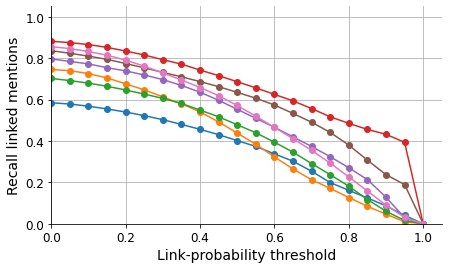

In [195]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(7,4 ))

for wiki_id in list_wiki_id:
    list_p_true = dict_p_true[wiki_id]
    list_p_false = dict_p_false[wiki_id]
    N_mentions = dict_N_mentions[wiki_id]

    arr_p_recall = 0.0*arr_p
    for i_p,p in enumerate(arr_p):
         arr_p_recall[i_p] = np.sum(list_p_true>=p)/N_mentions

    x =arr_p
    y =arr_p_recall
    ax.plot(x,y,marker='o',label=wiki_id)
    # ax.set_title("Cumulative distribution of linked mentions")

ax.set_xlabel("Link-probability threshold")
ax.set_ylabel("Recall linked mentions")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()
# ax.legend(loc='upper right')
plt.savefig('analysis_mentions_recall.pdf')

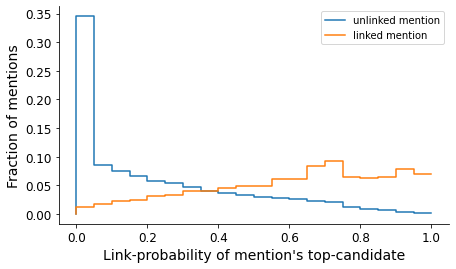

In [194]:
wiki_id = "arwiki"
list_p_true = dict_p_true[wiki_id]
list_p_false = dict_p_false[wiki_id]
N_mentions = dict_N_mentions[wiki_id]
fig, ax = plt.subplots(1, 1 ,figsize=(7,4 ))

bins = np.linspace(0.0,1.0,21)
H, edges = np.histogram(list_p_false,bins=bins,density=False)
H = np.append(0,H)/np.sum(H)
ax.step(edges,H,where='pre',label = 'unlinked mention')

H, edges = np.histogram(list_p_true,bins=bins,density=False)
H = np.append(0,H)/np.sum(H)
ax.step(edges,H,where='pre',label = 'linked mention')

ax.set_xlabel("Link-probability of mention's top-candidate")
ax.set_ylabel("Fraction of mentions")
ax.legend(loc="upper right")
plt.savefig('analysis_mentions_hist-%s.pdf'%wiki_id)

## Finding the correct mentions

from the entity linking anaylsis it is clear that once we have the right mention, there is a high probability to pick the correct link.
This suggests that the real challenge is to pick the correct anchor. This raises the following questions:
- from all the possible anchors we generate, how many of the real anchors we capture
- how good are we to distinguish false from true anchors

In [116]:
PATH_DATA = "../../data/{0}/testing/{0}.backtest-eval_mentions_nmax-{1}.json".format(wiki_id,nmax)

list_result = []
with open(PATH_DATA,'r') as fin:
for line in fin:
    dict_eval = json.loads(line)
    list_result += [dict_eval]
list_p_true = []
list_p_false = []


N_anchors_true = 0
N_anchors_found = 0
for page, page_wikicode in test_set[:10]:
    
    dict_eval = {}
    input_code = page_wikicode
    ## get links from original wikitext (resolve redirects, and )
    inp_pairs = getLinks(input_code, redirects=redirects, pageids=pageids)

    ## if no links in main namespace, go to next item
    if len(inp_pairs) == 0:
        continue
    input_code_nolinks = mwph.parse(page_wikicode).strip_code()
    
    linked_mentions=set(normalise_anchor(page))
    linked_links=set(normalise_title(page))
    tested_mentions = set()
    
    page_wikicode_init = str(input_code_nolinks)  # save the initial state
    page_wikicode_text_nodes = mwparserfromhell.parse(input_code_nolinks).filter_text(recursive=False)
    
    dict_eval["links"] = inp_pairs
    N_anchors_true += len(set(list(inp_pairs.keys())))
    
    list_topcand = []
    for node in page_wikicode_text_nodes:
        for gram in ngram_iterator(node, 10, 1):
            mention = gram.lower()
            mention_original = gram
#             print(mention)
            # if the mention exist in the DB
            # it was not previously linked (or part of a link)
            # none of its candidate links is already used
            # it was not tested before (for efficiency)
            if (
                mention in anchors
                and not any(mention in s for s in linked_mentions)
                and not bool(set(anchors[mention].keys()) & linked_links)
                and mention not in tested_mentions
            ):
                tested_mentions.add(mention)
                
                anchor = mention
                cand_prediction = {}
                # Work with the 10 most frequent candidates
                limited_cands = anchors[anchor]
                if len(limited_cands) > 10:
                    limited_cands = dict(
                        sorted(anchors[anchor].items(), key=operator.itemgetter(1), reverse=True)[:10]
                    )
                for cand in limited_cands:
                    cand_feats = get_feature_set(page, anchor, cand, anchors, word2vec, nav2vec)
                    # compute the model probability
                    cand_prediction[cand] = model.predict_proba(
                        np.array(cand_feats).reshape((1, -1))
                    )[0, 1]
                # Compute the top candidate
                top_candidate = max(cand_prediction.items(), key=operator.itemgetter(1))
                list_topcand += [(anchor, top_candidate[1])]
                if anchor in inp_pairs.keys():
                    list_p_true+=[top_candidate[1]]
                    N_anchors_found+=1
                else:
                    list_p_false+=[top_candidate[1]]
    dict_eval["mentions"] = list_topcand
    

In [117]:
dict_eval

{'links': {'point guard': 'Point Guard'},
 'mentions': [('(', 0.00013808347),
  (')', 0.00010381569),
  ('guards', 0.043285508),
  ('aufbauspieler', 0.04968906),
  (',', 0.0004114231)]}

In [150]:
wiki_id = "dewiki"
nmax = 10000

PATH_DATA = "../../data/{0}/testing/{0}.backtest-eval_mentions_nmax-{1}.json".format(wiki_id,nmax)

list_result = []
with open(PATH_DATA,'r') as fin:
    for line in fin:
        dict_eval = json.loads(line)
        list_result += [dict_eval]
        
        
len(list_result)


10000

In [154]:
list_p_true = [] ## link-probability of top-cand for linked mentions
list_p_false = [] ## link-probability of top-cand for not-linked mention
N_mentions = 0
N_mentions_found = 0
for result in list_result:
    inp_pairs = result["links"]
    mentions = result["mentions"]
    N_mentions += len(set(list(inp_pairs.keys())))
    for m,p in mentions:
        if m in inp_pairs.keys():
            list_p_true += [p]
            N_mentions_found += 1
        else:
            list_p_false += [p]
N_mentions

24392

In [155]:
N_mentions_found/N_mentions
## this is a central number
## we can generate a histogram, across the different languages!!!

0.7962446703837324

In [156]:
print(np.mean(list_p_false),np.std(list_p_false))
print(np.mean(list_p_true),np.std(list_p_true))

0.20583522010930602 0.2503534974897892
0.6313040701684974 0.25362317710062154


In [157]:
import matplotlib as mpl
import pylab as plt
%matplotlib inline 

In [158]:
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

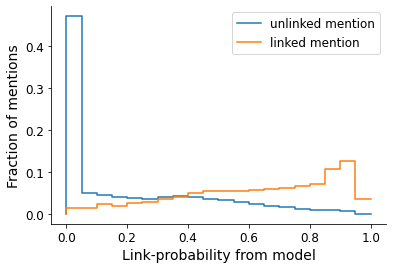

In [159]:
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

bins = np.linspace(0.0,1.0,21)
H, edges = np.histogram(list_p_false,bins=bins,density=False)
H = np.append(0,H)/np.sum(H)
ax.step(edges,H,where='pre',label = 'unlinked mention')

H, edges = np.histogram(list_p_true,bins=bins,density=False)
H = np.append(0,H)/np.sum(H)
ax.step(edges,H,where='pre',label = 'linked mention')

ax.set_xlabel("Link-probability from model")
ax.set_ylabel("Fraction of mentions")
ax.legend(loc="upper right")
plt.savefig('tmp.pdf')

Text(0.5, 1.0, 'Likelihood ratio linked vs unlinked')

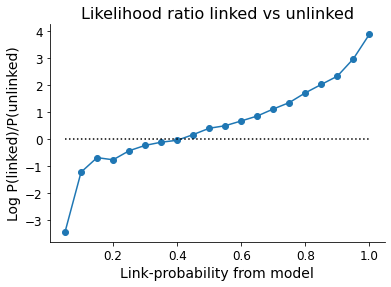

In [161]:
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

bins = np.linspace(0.0,1.0,21)
H1, edges = np.histogram(list_p_false,bins=bins,density=False)
H1 = H1/np.sum(H1)

H2, edges = np.histogram(list_p_true,bins=bins,density=False)
H2 = H2/np.sum(H2)

y = np.log(H2/H1)
x = bins[:-1] + (bins[1]-bins[0])
ax.plot(x,y,marker='o')
ax.plot(x,0.0*x,color="black",ls=":")
ax.set_xlabel("Link-probability from model")
ax.set_ylabel("Log P(linked)/P(unlinked)")
ax.set_title("Likelihood ratio linked vs unlinked")
# ax.legend(loc="upper right")
# plt.savefig('tmp.pdf')

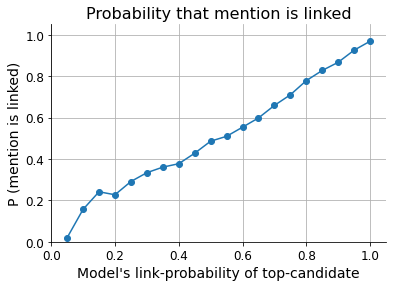

In [162]:
## actually, we want P(linked | p)
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

bins = np.linspace(0.0,1.0,21)


H1, edges = np.histogram(list_p_false,bins=bins,density=False)
H2, edges = np.histogram(list_p_true,bins=bins,density=False)


y = H2/(H1+H2)
x = bins[:-1] + (bins[1]-bins[0])
ax.plot(x,y,marker='o')
ax.set_xlabel("Model's link-probability of top-candidate")
ax.set_ylabel("P (mention is linked)")
ax.set_title("Probability that mention is linked")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()
# ax.legend(loc="upper right")
# plt.savefig('tmp.pdf')

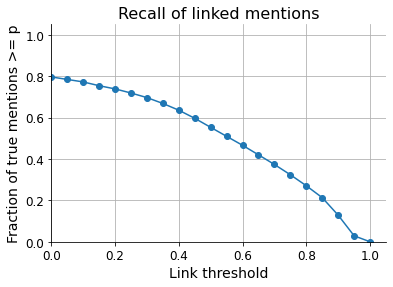

In [170]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

arr_p = np.linspace(0.0,1.0,21)
arr_p_recall = 0.0*arr_p
for i_p,p in enumerate(arr_p):
     arr_p_recall[i_p] = np.sum(list_p_true>=p)/N_mentions

x =arr_p
y =arr_p_recall
ax.plot(x,y,marker='o')
ax.set_title("Recall of linked mentions")

ax.set_xlabel("Link threshold")
ax.set_ylabel("Fraction of true mentions >= p")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()
# ax.legend(loc="upper right")
# plt.savefig('tmp.pdf')

/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


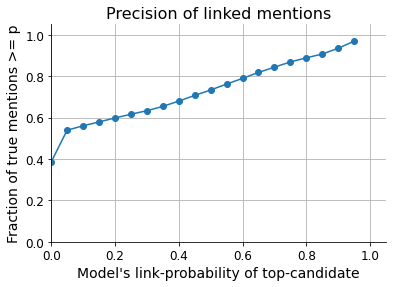

In [169]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

arr_p = np.linspace(0.0,1.0,21)
arr_p_pre = 0.0*arr_p
for i_p,p in enumerate(arr_p):
    n_true = np.sum(list_p_true>=p)
    n_false = np.sum(list_p_false>=p)
    arr_p_pre[i_p] = n_true/(n_true+n_false)

x =arr_p
y =arr_p_pre
ax.plot(x,y,marker='o')
ax.set_title("Precision of linked mentions")

ax.set_xlabel("Link threshold")
ax.set_ylabel("Fraction of true mentions >= p")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()
# ax.legend(loc="upper right")
# plt.savefig('tmp.pdf')

/home/mgerlach/venv_custom/mwaddlink/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()


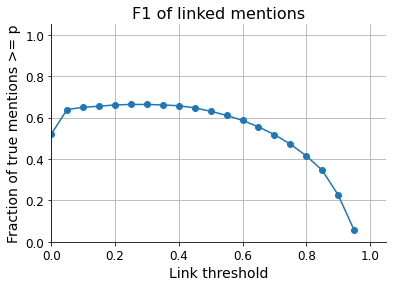

In [171]:
## cumulative distribution of linked-mentions
fig, ax = plt.subplots(1, 1 ,figsize=(6,4 ))

arr_p = np.linspace(0.0,1.0,21)
arr_p_pre = 0.0*arr_p
arr_p_recall = 0.0*arr_p

for i_p,p in enumerate(arr_p):
    n_true = np.sum(list_p_true>=p)
    n_false = np.sum(list_p_false>=p)
    arr_p_pre[i_p] = n_true/(n_true+n_false)
    arr_p_recall[i_p] = np.sum(list_p_true>=p)/N_mentions
x =arr_p
y =2*(arr_p_pre*arr_p_recall)/(arr_p_pre+arr_p_recall)
ax.plot(x,y,marker='o')
ax.set_title("F1 of linked mentions")

ax.set_xlabel("Link threshold")
ax.set_ylabel("Fraction of true mentions >= p")
ax.set_xlim(0,1.05)
ax.set_ylim(0,1.05)
ax.grid()